In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cp /content/drive/MyDrive/CSVs/* ./

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

In [9]:
from pandas_datareader import data as pdr
from datetime import datetime

In [38]:
df = pd.read_csv('/content/Facebook_stock.csv')

In [39]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-12-31,134.639999,129.949997,134.449997,131.089996,24625300,131.089996
1,2019-01-02,137.509995,128.559998,128.990005,135.679993,28146200,135.679993
2,2019-01-03,137.169998,131.119995,134.690002,131.740005,22717900,131.740005
3,2019-01-04,138.000000,133.750000,134.009995,137.949997,29002100,137.949997
4,2019-01-07,138.869995,135.910004,137.559998,138.050003,20089300,138.050003


In [40]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
248,2019-12-24,206.789993,205.000000,206.300003,205.119995,6046300,205.119995
249,2019-12-26,207.820007,205.309998,205.570007,207.789993,9350700,207.789993
250,2019-12-27,208.929993,206.589996,208.669998,208.100006,10284200,208.100006
251,2019-12-30,207.899994,203.899994,207.860001,204.410004,10524300,204.410004
252,2019-12-31,205.559998,203.600006,204.000000,205.250000,8953500,205.250000


In [41]:
close = df['Close']
print(close)

0      131.089996
1      135.679993
2      131.740005
3      137.949997
4      138.050003
          ...    
248    205.119995
249    207.789993
250    208.100006
251    204.410004
252    205.250000
Name: Close, Length: 253, dtype: float64


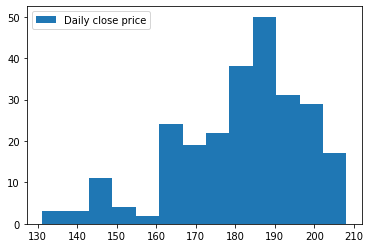

In [42]:
plt.hist(close,bins="rice",label="Daily close price")
plt.legend()
plt.show()

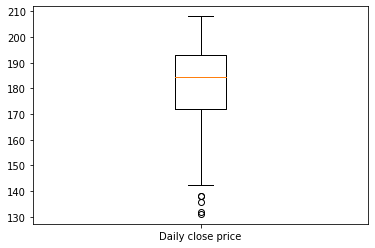

In [43]:
plt.boxplot(close,labels=["Daily close price"])
plt.show()

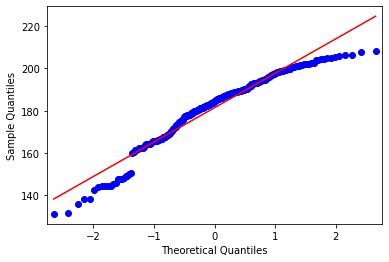

In [44]:
from statsmodels.graphics.gofplots import qqplot
qqplot(close, line='s')
plt.show()

In [45]:
print("Mean is: ", np.mean(close))
print("Standard deviation is: ", np.std(close))
print("Median is: ", np.quantile(close,0.5))

Mean is:  181.4377071094136
Standard deviation is:  16.299855800829746
Median is:  184.50999450683597


In [46]:
print("Skewness of the distribution is: ", stats.skew(close))

Skewness of the distribution is:  -0.854742806853915


In [47]:
print("Skewtest of the distribution is: ", stats.skewtest(close))

Skewtest of the distribution is:  SkewtestResult(statistic=-5.025002529544916, pvalue=5.034259008415805e-07)


In [48]:
print("Kurtosis of the distributionn is: ", stats.kurtosis(close))

Kurtosis of the distributionn is:  0.3965659664593


In [49]:
print("Kurtosis test of the distribution is: ", stats.kurtosistest(close))

Kurtosis test of the distribution is:  KurtosistestResult(statistic=1.350773516918725, pvalue=0.1767679939686544)


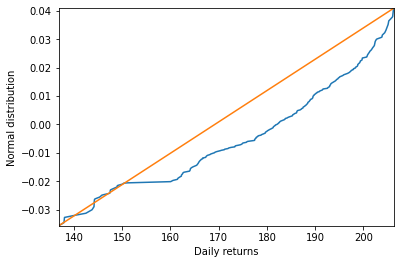

In [50]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(close,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

## Daily Return

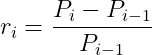

In [51]:
## Daily Return
returns = close.pct_change(1).dropna()
print(returns)

1      0.035014
2     -0.029039
3      0.047138
4      0.000725
5      0.032452
         ...   
248   -0.005141
249    0.013017
250    0.001492
251   -0.017732
252    0.004109
Name: Close, Length: 252, dtype: float64


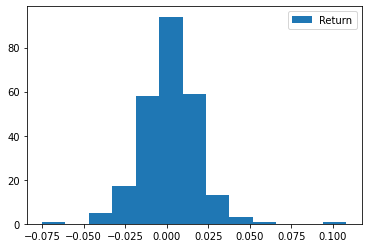

In [52]:
plt.hist(returns, bins="rice", label="Return")
plt.legend()
plt.show()

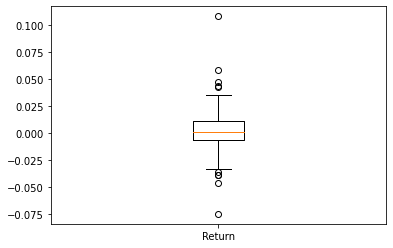

In [53]:
plt.boxplot(returns ,labels=["Return"])
plt.show()

In [54]:
print("Mean is: ", np.mean(returns))
print("Standard deviation is: ", np.std(returns))
print("Median is: ", np.quantile(returns,0.5))

Mean is:  0.0019331269999856788
Standard deviation is:  0.017526150078843134
Median is:  0.0010256425204406838


In [55]:
print("Skewness of the distribution is: ", stats.skew(returns))

Skewness of the distribution is:  0.6066155840876521


In [56]:
print("Skewtest of the distribution is: ", stats.skewtest(returns))

Skewtest of the distribution is:  SkewtestResult(statistic=3.760033371589942, pvalue=0.00016989069235316372)


In [57]:
print("Kurtosis of the distributionn is: ", stats.kurtosis(returns))

Kurtosis of the distributionn is:  6.1657849444899195


In [58]:
print("Kurtosis test of the distribution is: ", stats.kurtosistest(returns))

Kurtosis test of the distribution is:  KurtosistestResult(statistic=6.440350313934817, pvalue=1.1919806027391748e-10)


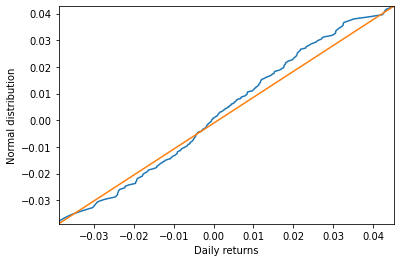

In [59]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

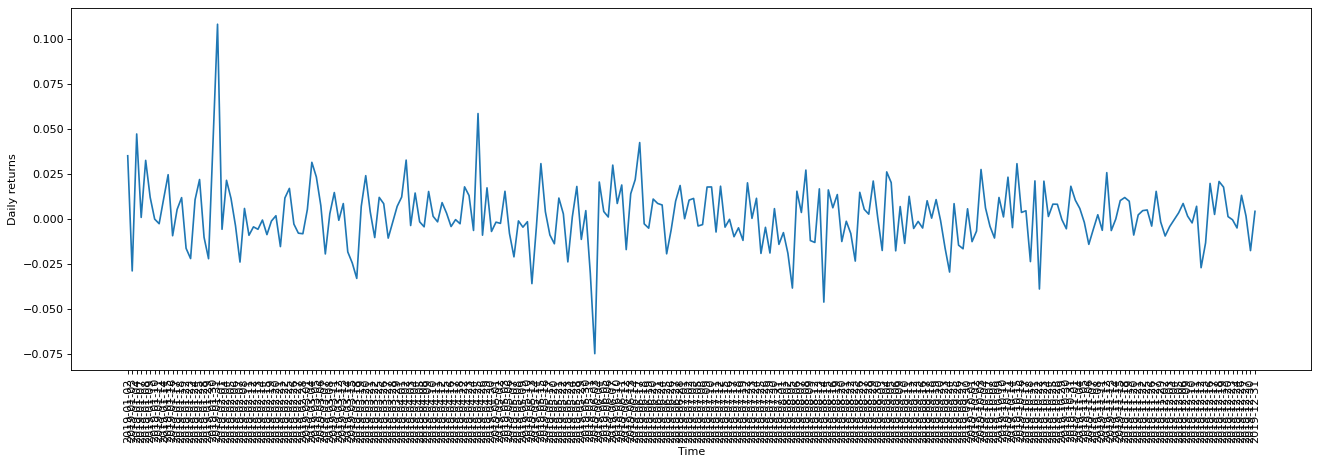

In [60]:
## Volatility of the distribution curve.
## Look at the original time series
plt.figure(figsize=(20, 6), dpi=80)
dates= df["Date"][1:]
data=[[i,j] for i,j in zip(dates,returns)]
plt.plot(dates,returns)
plt.xticks(rotation=90)
plt.xlabel("Time")
plt.ylabel("Daily returns")
plt.show()

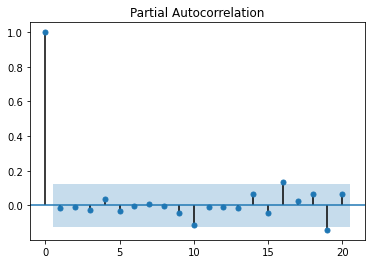

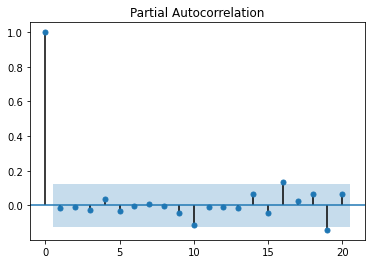

In [61]:
## Auto correlation function
plot_pacf(returns,lags=20)